# 8.1 핵심 개념
- 여러 분류기를 학습시킨 후 각각의 분류기가 예츠가는 레이블 범주가 가장 많이 나오는 범주를 예측하는 방법
- 개별 분류기의 최적 하이퍼파라미터를 찾은 후, 투표기반 앙상블로 모델을 만들어 좀 더 좋은 분류와 회귀 예측

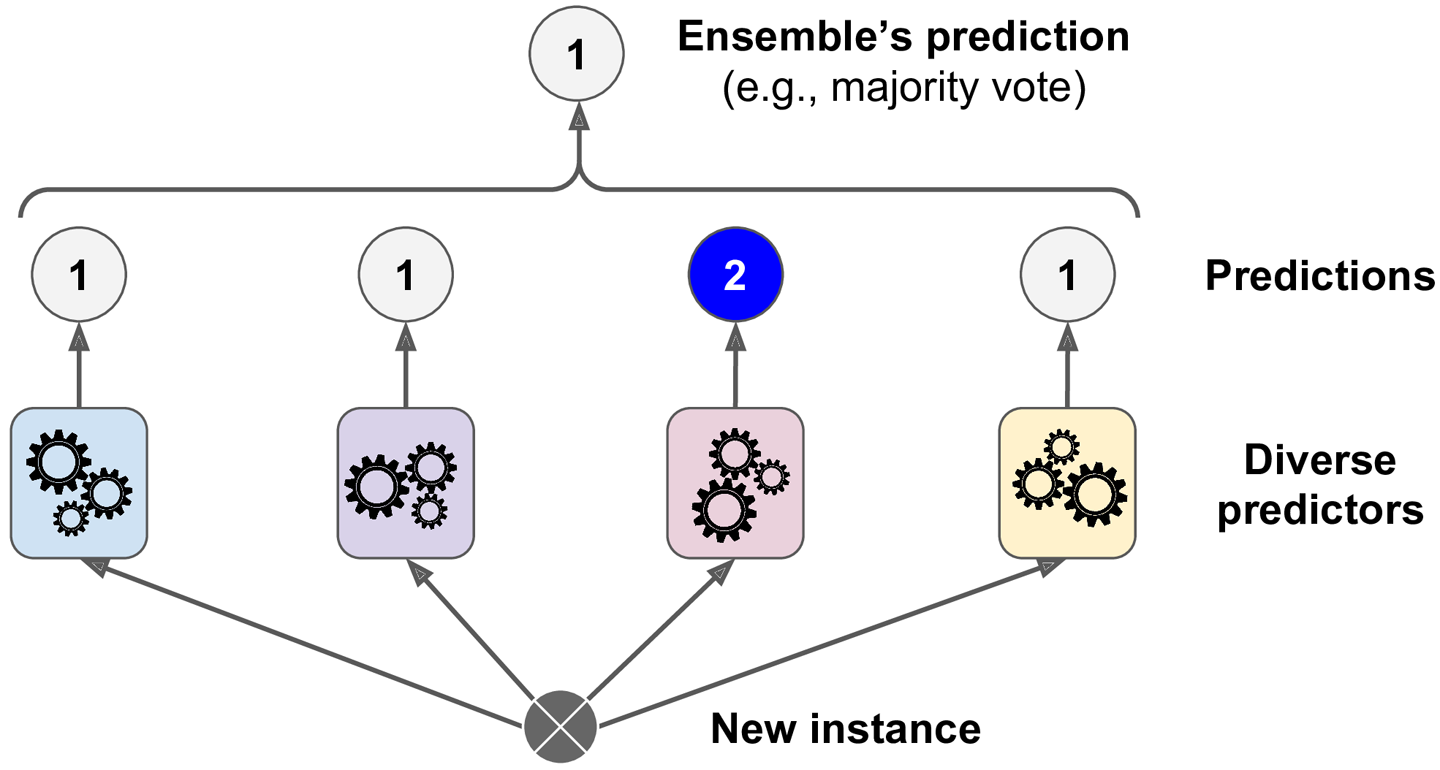
- 로지스틱 모델, 서포트벡터머신, 랜덤포레스트 등 여러 머신러닝 분류기를 수행한 후 예측 범주가 많이 나온 것을 최종 범주로 분류
- 범주 기반일 경우 'Hard Learner', 확률 기반일 경우 'Soft Learner'

# 8.3 분석 코드

## Part1. 분류

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42) 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

#강한 학습기 : hard learner : 범주 기반
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

logit_model=LogisticRegression(random_state=42)
rnf_model=RandomForestClassifier(random_state=42)
svm_model=SVC(random_state=42,probability=True)

voting_hard=VotingClassifier(estimators=[('lr',logit_model),('rf',rnf_model),('svc',svm_model)], voting='hard')
voting_hard.fit(X_scaled_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [29]:
from sklearn.metrics import accuracy_score

for clf in (logit_model, rnf_model, svm_model, voting_hard):
    clf.fit(X_scaled_train, y_train)
    y_pred=clf.predict(X_scaled_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


In [30]:
voting_soft=VotingClassifier(estimators=[('lr',logit_model),('rf',rnf_model),('svc',svm_model)], voting='soft')
voting_soft.fit(X_scaled_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [31]:
for clf in (logit_model, rnf_model, svm_model, voting_soft):
    clf.fit(X_scaled_train, y_train)
    y_pred=clf.predict(X_scaled_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


## Part2. 회귀

In [37]:
data2=pd.read_csv("../data/house_price.csv", encoding='utf-8')

X=data2[data2.columns[:-1]]
y=data2[['house_value']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

linear_model=LinearRegression()
rfr_model=RandomForestRegressor(random_state=42)
voting_regressor=VotingRegressor(estimators=[('lr',linear_model),('rf',rfr_model)])
voting_regressor.fit(X_scaled_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42))])

In [38]:
pred_train=voting_regressor.predict(X_scaled_train)
voting_regressor.score(X_scaled_train, y_train)

0.8128809262725605

In [39]:
pred_test=voting_regressor.predict(X_scaled_test)
voting_regressor.score(X_scaled_test, y_test)

0.6269061036317223

In [40]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))

print("훈련데이터 RMSE : ",RMSE_train)
print("테스트데이터 RMSE : ",RMSE_test)

훈련데이터 RMSE :  41286.69066796455
테스트데이터 RMSE :  58394.44646733741
